## DSCI 100 Project
### Individual Planning Stage

### Part 1 - Data Description

The dataset consists of two comma-separated values files, `players.csv` and `sessions.csv`, both collected from stats of players in the game. The data seems to be taken from game logs, with user-inputted information from players profiles serving as the different variables. User-inputted information is not always 100% accurate, as some users may falsify their Age, gender, or name.

#### `players.csv`
- 196 observations and 7 variables
| Variable      | Type     | Meaning                                                      |
|---------------|----------|--------------------------------------------------------------|
| experience    | Character | Describes the experience level of the player.               |
| subscribe     | Logical   | "TRUE" if players are subscribed, "FALSE" if not subscribed.|
| hashedEmail   | Character | Unique ID code for each player.                             |
| played_hours  | Double    | Number of hours spent in-game, as a decimal.                |
| name          | Character | The name of each player.                                    |
| gender        | Character | The gender of each player.                                  |
| Age           | Double    | Age of each player.                                         |


- Of 196 total players, 144 are subscribed and 52 are not subscribed
- In the experience variable, there are 63 Amateur, 35 Beginner, 14 Pro, 36 Regular, and 48 Veteran
- A summary of the quantitative variable `played_hours`, grouped by experience level:
| experience  | min | max   | mean       |
|-------------|-----|-------|------------|
| All         | 0   | 223.10|   5.85     |
| Amateur     | 0   | 150.00| 6.02       |
| Beginner    | 0   | 23.70 | 1.25       |
| Pro         | 0   | 30.30 | 2.60       |
| Regular     | 0   | 223.10| 18.21      |
| Veteran     | 0   | 12.50 | 0.65       |

- A summary of the quantitative variable `Age`, grouped by gender (Other and Two-Spirited exlcuded, as no Age was entered):
| gender             | min | max | mean     |
|--------------------|-----|-----|----------|
| All                | 9   |  58 | 21.14    |
| Agender            | 20  | 27  | 23.50    |
| Female             | 16  | 44  | 21.81    |
| Male               | 9   | 58  | 20.85    |
| Non-binary         | 17  | 25  | 19.07    |
| Prefer not to say  | 17  | 57  | 25.00    | 

##### Issues
43% of the dataset logs 0 hours played, which could potential skew the data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### `sessions.csv`
- 1535 observations and 5 variables
| Name                 | Type      | Meaning                                                           |
|----------------------|-----------|-------------------------------------------------------------------|
| hashedEmail          | Character | Unique ID code for each player                                    |
| start_time           | Character | Start date and time of each session (DD/MM/YYYY and 24-hour clock)|
| end_time             | Character | End date and time of each session (DD/MM/YYYY and 24-hour clock)  |
| original_start_time  | Double    | Start time of each session in Unix epoch format                   |
| original_end_time    | Double    | End time of each session in Unix epoch format                     |


- The quantitative variables `original_start_time` and `original_end_time` share the same min, max, and mean to 2 decimal places:
| Variable            | Min        | Max        | Mean       |
|---------------------|------------|------------|------------|
| original_start_time | 1.71e+12   | 1.72e+12   | 1.73e+12   |
| original_end_time   | 1.71e+12   | 1.72e+12   | 1.73e+12   |


##### Issues
Some potential issues with the raw dataset: the date and time are in the same column. They should be separated into `date`, `start_time`, `end_time`. The times of sessions are characters, not numbers. The dates are also not in a decimal format, which would not be useful for finding length of sessions, and would need to be altered.

### Part 2 - Questions

The broad question this project will address is "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"The `players.csv` dataset is ideal, as it contains variables such as `Age`, `gender`, and `experience`, along with the logical variable `subscribe` (TRUE if subscribed, FALSE if not). This allows for specific analysis of if experience level and hours played can predict players are subscribed to the game-related newsletter.

### Part 3 - Exploratory Data Analysis and Visualisation

In [140]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyr)
library(ggplot2)
options(repr.matrix.max.rows = 6)

In [141]:
# Load dataset

players_df <- read_csv("players.csv",show_col_types = FALSE)
players_df

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [142]:
# Minimum tidying

players <- players_df |>
        select(experience, subscribe, played_hours)|>
        mutate(subscribe = as_factor(subscribe))
players

experience,subscribe,played_hours
<chr>,<fct>,<dbl>
Pro,TRUE,30.3
Veteran,TRUE,3.8
Veteran,FALSE,0.0
⋮,⋮,⋮
Amateur,FALSE,0.0
Amateur,FALSE,2.3
Pro,TRUE,0.2


In [143]:
# Compute mean of quantitative variables

players_avg <- players_df |>
    select(played_hours,Age)|>
    map_df(mean, na.rm = TRUE)
players_avg

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


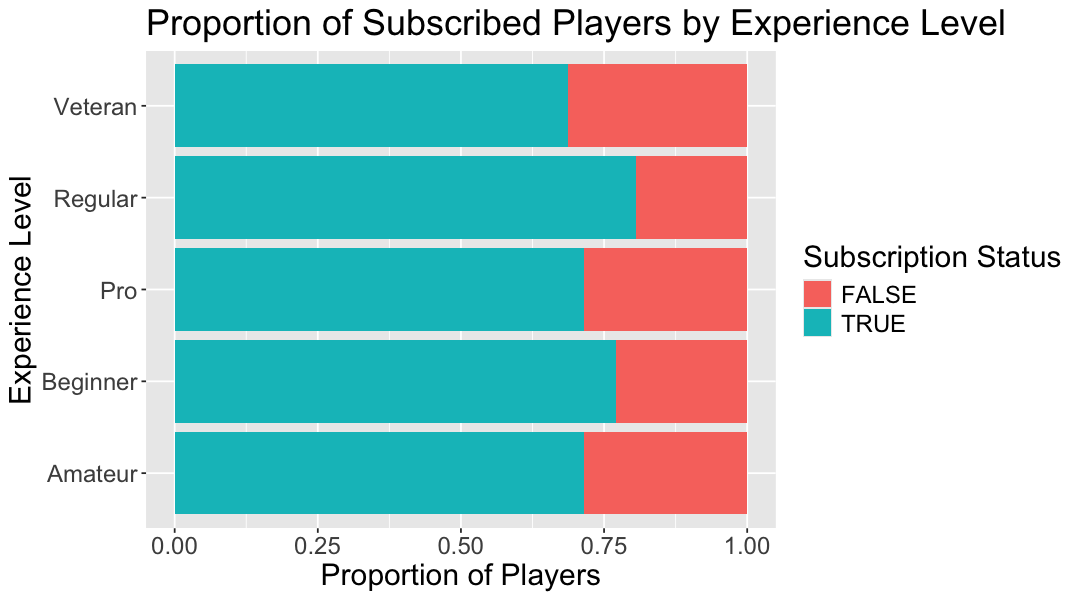

In [157]:
# Visualisation # 1

options(repr.plot.width = 9, repr.plot.height = 5)
players_plot <- players |>
        ggplot(aes(y = experience, fill = subscribe)) +
        geom_bar(position = "fill") +
        labs(x = "Proportion of Players", y = "Experience Level", fill = "Subscription Status", title = "Proportion of Subscribed Players by Experience Level")+
        theme(text = element_text(size = 18))
players_plot

This plot demonstrates that although there is no linear correlation between experience level and proportion of players subscribed, there is still an indication of what characteristics of players might make them more prone to subscribe. For example, regular players have the highest subscription rate, which suggests that the newsletter should be targeted towards mid-level players.

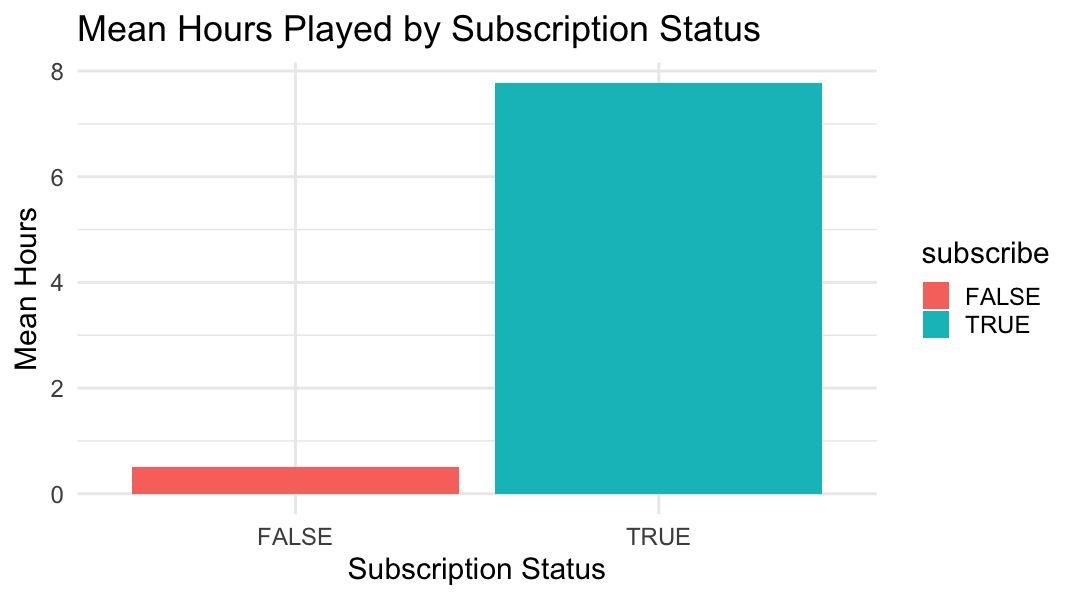

In [171]:
# Visualisation # 2

players_sub <- players |>
    group_by(subscribe) |>
    summarise(mean_hours = mean(played_hours, na.rm = TRUE))

players_plot2 <- players_sub |> 
    ggplot(aes(x = subscribe, y = mean_hours, fill = subscribe)) +
    geom_bar(stat="identity") +
    labs(title = "Mean Hours Played by Subscription Status",x = "Subscription Status",y = "Mean Hours") +
    theme_minimal(base_size = 18)
players_plot2

This plots suggests that subscribed players have a higher average of played hours than unsubscribed players.